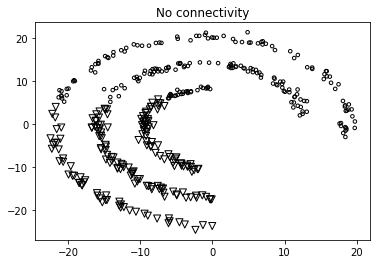

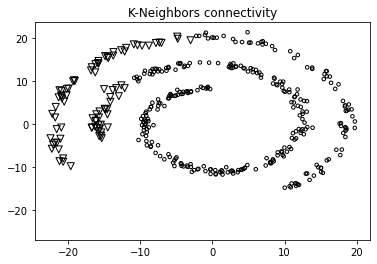

In [5]:
# 层次聚类可以用一棵树表示：
# 1.由下而上，不断合并，称为凝聚层次聚类
# 2.由上而下，不断分解
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# 定义一个实现凝聚层次聚类的函数
def perform_clustering(X, connectivity, title, num_clusters=3, linkage='ward'):
    plt.figure()
    model =  AgglomerativeClustering(linkage=linkage, connectivity=connectivity, n_clusters=num_clusters)
    model.fit(X)

    # 提取标记
    labels = model.labels_
    markers = '.vx'

    # 迭代数据点
    for i,marker in zip(range(num_clusters),markers):
        # 画出属于某个集群中心的数据点
        plt.scatter(X[labels==i,0], X[labels==i,1], s=50, marker=marker, color='k',facecolor='none')
    
    plt.title(title)

'''
为了演示凝聚层次聚类的优势，假设数据点在空间中连接在一起/彼此非常接近：
将连接在一起的聚类，而不是空间进的聚类
'''
# 获取螺旋状的数据点
def get_spiral(t, noise_amplitude=0.5):
    r = t
    x = r * np.cos(t)
    y = r * np.sin(t)
    
    return add_noise(x,y,noise_amplitude)

# 为增加不确定性，给定一个噪声函数
def add_noise(x, y, amplitude):
    X = np.concatenate((x, y))
    X += amplitude * np.random.randn(2, X.shape[1])
    return X.T


# 再定义一个函数，获取位于玫瑰曲线上的数据点（极坐标中的正弦曲线）
def get_rose(t, noise_amplitude=0.02):
    #设置玫瑰曲线方程，k奇数则有k朵花瓣；k为偶数，则有2k朵花瓣
    k = 5
    r = np.cos(k*t) + 0.25
    x = r * np.cos(t)
    y = r * np.sin(t)
    
    return add_noise(x,  y, noise_amplitude)


# 为了增加多样性，再定义一个 hypotrochoid 函数
def get_hypotrochoid(t, noise_amplitude=0):
    a, b, h = 10.0, 2.0, 4.0
    x = (a - b) * np.cos(t) + h * np.cos((a - b)/ b * t)
    y = (a - b) * np.sin(t) - h * np.sin((a - b)/ b * t)
    return add_noise(x, y, 0)

# 生成样本数据
n_samples = 500
np.random.seed(2)
t = 2.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
X = get_spiral(t)
    
# 不考虑螺旋形的数据连接性
connectivity = None
perform_clustering(X, connectivity, 'No connectivity')
    
# 根据数据连接线创建K各临近点的图形
connectivity = kneighbors_graph(X, 10, include_self=False)
perform_clustering(X, connectivity, 'K-Neighbors connectivity')
    
plt.show()